In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Hierarchical Clustering/Dataset/google_review_ratings.csv')

In [5]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
df.shape

(5456, 26)

In [7]:
data=df.drop('Unnamed: 25',axis=1)
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [8]:
column_names=['user_id','churches','resorts','beaches','parks','theaters','museums','malls','zoo','restaurent','pubs_bars','local_services','burzer_pizza_shops','hotel_other_lodgings','juice_bars','art_gallaries','dance_clubs','swimming_pools','gyms','bakeries','beauty_spas','cafes','view_points','monuments','gardens']

In [9]:
data.columns=column_names
data.head()

,user_id,churches,resorts,beaches,parks,theaters,museums,malls,zoo,restaurent,...,art_gallaries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               5456 non-null   object 
 1   churches              5456 non-null   float64
 2   resorts               5456 non-null   float64
 3   beaches               5456 non-null   float64
 4   parks                 5456 non-null   float64
 5   theaters              5456 non-null   float64
 6   museums               5456 non-null   float64
 7   malls                 5456 non-null   float64
 8   zoo                   5456 non-null   float64
 9   restaurent            5456 non-null   float64
 10  pubs_bars             5456 non-null   float64
 11  local_services        5456 non-null   object 
 12  burzer_pizza_shops    5455 non-null   float64
 13  hotel_other_lodgings  5456 non-null   float64
 14  juice_bars            5456 non-null   float64
 15  art_gallaries        

In [11]:
data['local_services'].unique()

array(['1.7', '1.73', '1.71', '1.69', '1.67', '1.65', '1.66', '1.64',
       '1.63', '5', '1.56', '1.55', '1.53', '1.52', '1.51', '1.5', '1.49',
       '1.48', '1.46', '2.13', '2.12', '2.1', '2.09', '2.08', '2.07',
       '2.06', '2.05', '2.04', '2.03', '2.01', '2', '1.98', '1.97',
       '1.95', '1.93', '1.91', '1.9', '1.88', '1.86', '1.84', '1.83',
       '1.81', '1.79', '1.77', '1.74', '1.72', '1.68', '1.61', '1.6',
       '1.59', '1.58', '1.99', '2.47', '2.35', '2.48', '2.59', '3.39',
       '2.31', '2.78', '2.79', '2.77', '2.76', '2.75', '2.74', '2.72',
       '2.71', '2.69', '2.68', '2.66', '2.65', '2.63', '2.61', '2.57',
       '2.55', '2.53', '2.51', '2.49', '1.94', '1.92', '1.82', '1.76',
       '1.62', '4.08', '4.04', '4.02', '4.01', '4', '3.99', '3.98',
       '3.96', '3.95', '3.94', '3.93', '3.91', '3.9', '3.88', '3.87',
       '3.86', '3.84', '3.85', '2.17', '3', '2.99', '2.82', '2.83',
       '2.81', '2.8', '2.73', '2.67', '2.64', '2.62', '2.54', '2.52',
       '2.5', '2.

In [12]:
data['local_services'].replace({'2\t2.':np.NaN},inplace=True)

In [13]:
data['local_services'].dropna(inplace=True)

In [14]:
data['local_services']=data['local_services'].astype('float')

In [15]:
data_manipulated=data.copy(deep=True)

In [16]:
data_manipulated.describe()

,churches,resorts,beaches,parks,theaters,museums,malls,zoo,restaurent,pubs_bars,...,art_gallaries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [17]:
data.describe(include='object')

,user_id
count,5456
unique,5456
top,User 1
freq,1


In [18]:
missing_values=data_manipulated.isnull().sum()

In [19]:
missing_values

user_id                 0
churches                0
resorts                 0
beaches                 0
parks                   0
theaters                0
museums                 0
malls                   0
zoo                     0
restaurent              0
pubs_bars               0
local_services          1
burzer_pizza_shops      1
hotel_other_lodgings    0
juice_bars              0
art_gallaries           0
dance_clubs             0
swimming_pools          0
gyms                    0
bakeries                0
beauty_spas             0
cafes                   0
view_points             0
monuments               0
gardens                 1
dtype: int64

In [20]:
data_no_missing=data_manipulated.fillna(data_manipulated.mean())

C:\Users\karth\AppData\Local\Temp\ipykernel_5308\1779761430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_no_missing=data_manipulated.fillna(data_manipulated.mean())


In [21]:
data_no_missing.isnull().sum()

user_id                 0
churches                0
resorts                 0
beaches                 0
parks                   0
theaters                0
museums                 0
malls                   0
zoo                     0
restaurent              0
pubs_bars               0
local_services          0
burzer_pizza_shops      0
hotel_other_lodgings    0
juice_bars              0
art_gallaries           0
dance_clubs             0
swimming_pools          0
gyms                    0
bakeries                0
beauty_spas             0
cafes                   0
view_points             0
monuments               0
gardens                 0
dtype: int64

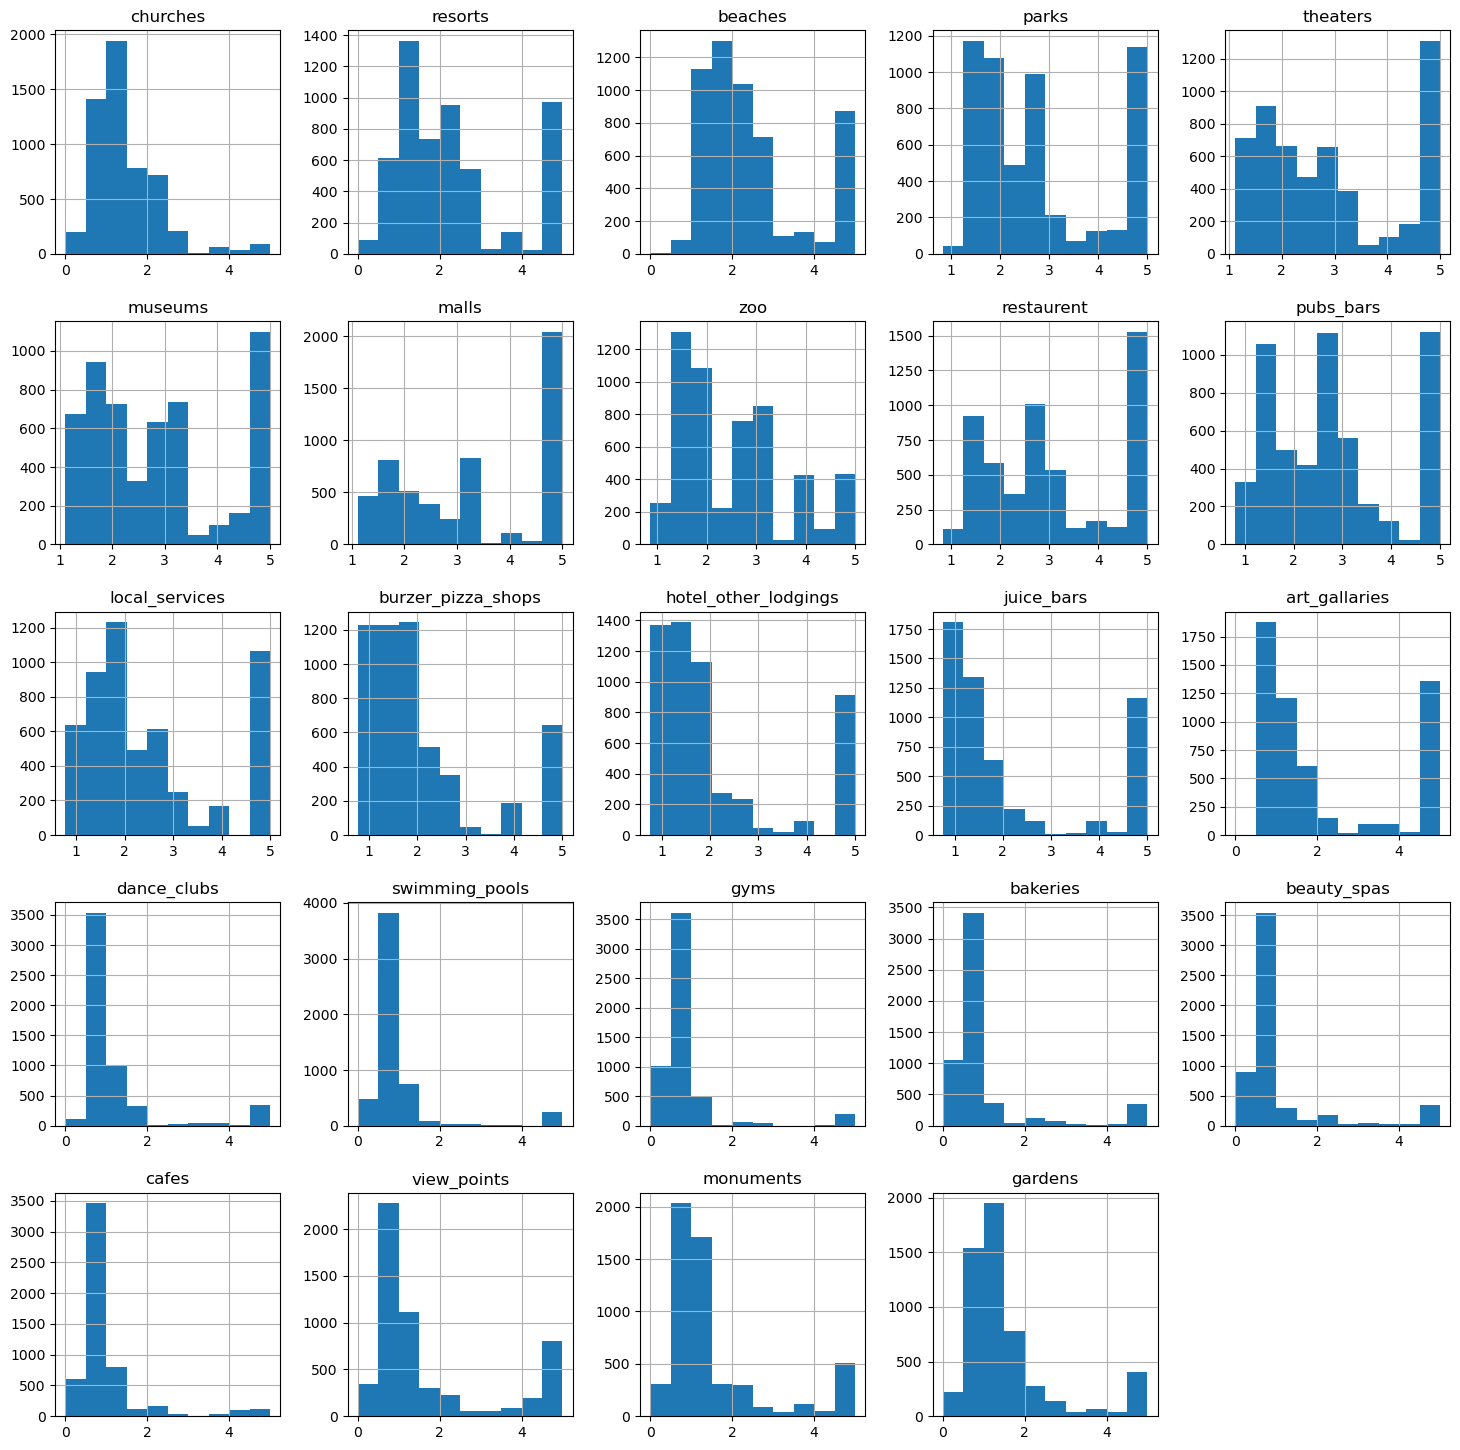

In [22]:
fig=data_no_missing.hist(figsize=(18,18))

In [23]:
data_desc=data_no_missing.describe()
rated=data_desc.loc['min']>0
rated[rated]

parks                   True
theaters                True
museums                 True
malls                   True
zoo                     True
restaurent              True
pubs_bars               True
local_services          True
burzer_pizza_shops      True
hotel_other_lodgings    True
juice_bars              True
Name: min, dtype: bool

In [24]:
reviews=data_no_missing[column_names[1:]].astype(bool).sum().sort_values()
reviews

bakeries                4410
gyms                    4439
beauty_spas             4560
cafes                   4852
swimming_pools          4977
view_points             5111
monuments               5154
gardens                 5231
churches                5261
dance_clubs             5344
resorts                 5366
art_gallaries           5452
beaches                 5452
pubs_bars               5456
local_services          5456
zoo                     5456
hotel_other_lodgings    5456
juice_bars              5456
malls                   5456
museums                 5456
theaters                5456
parks                   5456
restaurent              5456
burzer_pizza_shops      5456
dtype: int64

In [25]:
column_names=data_no_missing.columns.values

Text(0.5, 1.0, 'no of reviews under each category')

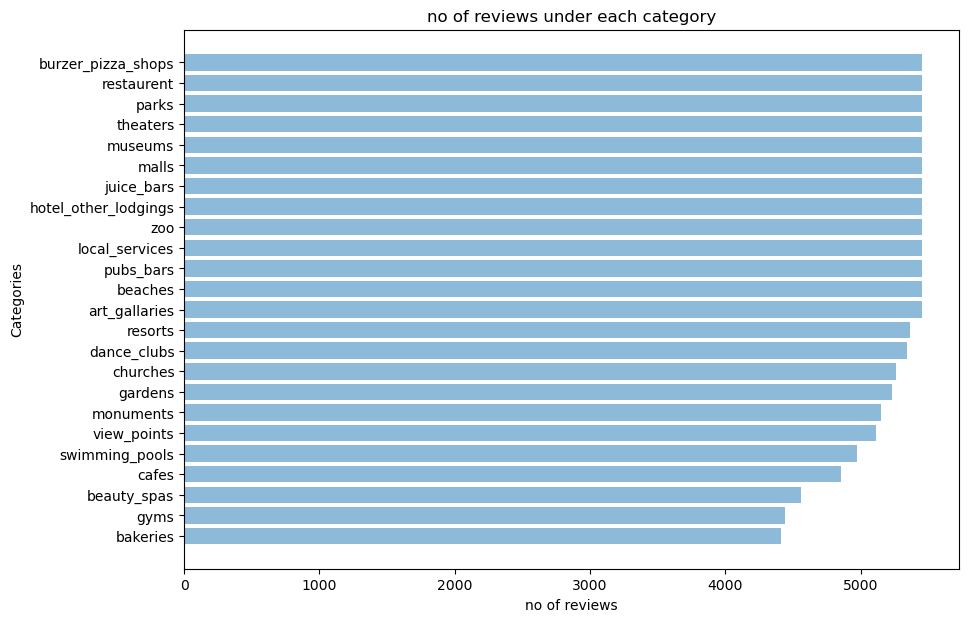

In [26]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])),reviews.values,align='center',alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])),reviews.index)
plt.xlabel('no of reviews')
plt.ylabel('Categories')
plt.title('no of reviews under each category')

In [28]:
no_of_reviews=data_no_missing[column_names[1:]].astype(bool).sum(axis=1).value_counts()
no_of_reviews

24    3725
23     505
21     457
20     243
22     167
19     148
18     114
17      69
16      22
15       6
dtype: int64

Text(0.5, 1.0, 'no of category vs no of reviews ')

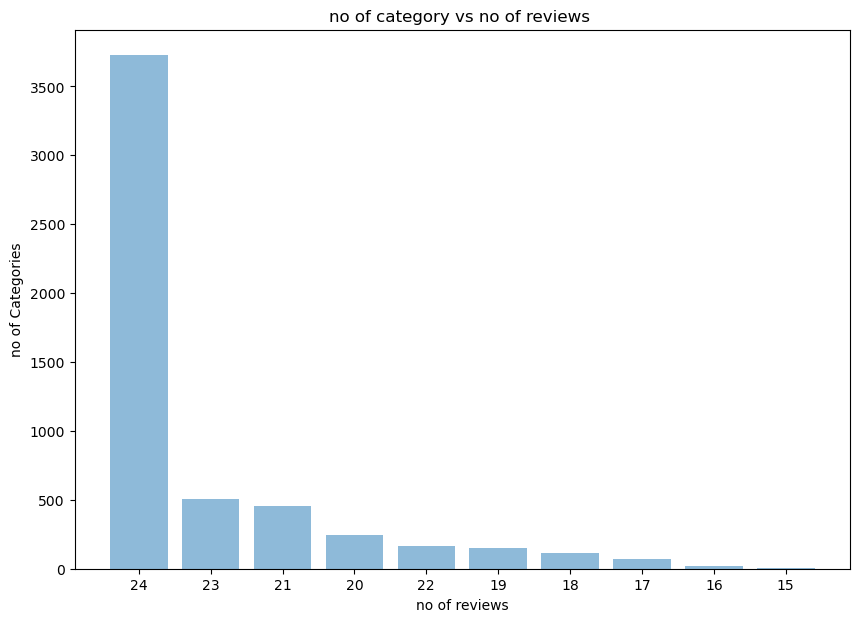

In [29]:
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(no_of_reviews)),no_of_reviews.values,align='center',alpha=0.5)
plt.xticks(np.arange(len(no_of_reviews)),no_of_reviews.index)
plt.xlabel('no of reviews')
plt.ylabel('no of Categories')
plt.title('no of category vs no of reviews ')

# Conclusion
Around 3500 user have given a rating for all the 24 categories and the least no of rating given by a user is 15. So for users with lesser number of ratings a recommendation system can be built

Now lets check the average rating per feature

In [30]:
avg_rating=data_no_missing[column_names[1:]].mean()
avg_rating=avg_rating.sort_values()

Text(0.5, 1.0, ' avg rating per Categories')

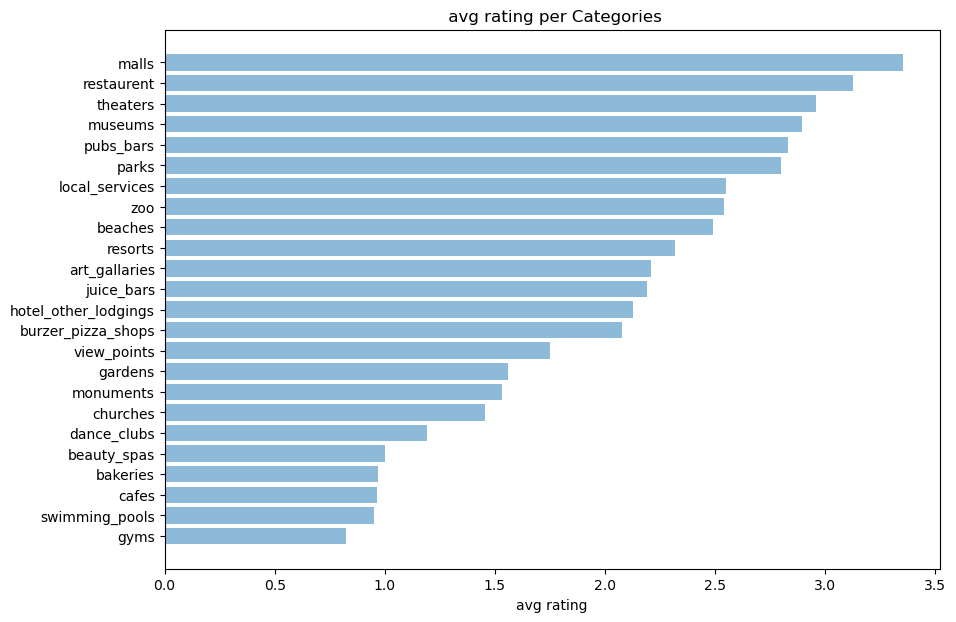

In [31]:
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(column_names[1:])),avg_rating.values,align='center',alpha=0.5)
plt.yticks(np.arange(len(column_names[1:])),avg_rating.index)
plt.xlabel('avg rating')
plt.title(' avg rating per Categories')


In [32]:
data_1=data_no_missing.copy()
new=data_1['user_id'].str.split(' ',n=2,expand=True)
data_1['user']=new[0]
data_1['id']=new[1]
data_1=data_1.drop(['user_id','user'],axis=1)
data_1.head()


,churches,resorts,beaches,parks,theaters,museums,malls,zoo,restaurent,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


In [33]:
data_final=data_1.copy(deep=True)
data_final.head()

,churches,resorts,beaches,parks,theaters,museums,malls,zoo,restaurent,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5


In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram , linkage

In [35]:
z=sch.linkage(data_final,method='ward')
z

array([[2.99000000e+02, 3.00000000e+02, 1.00005000e+00, 2.00000000e+00],
       [6.72000000e+02, 6.73000000e+02, 1.00005000e+00, 2.00000000e+00],
       [2.16000000e+03, 2.16100000e+03, 1.00005000e+00, 2.00000000e+00],
       ...,
       [1.09020000e+04, 1.09050000e+04, 3.22742555e+04, 2.06400000e+03],
       [1.09060000e+04, 1.09070000e+04, 6.91602450e+04, 3.39200000e+03],
       [1.09080000e+04, 1.09090000e+04, 1.38199023e+05, 5.45600000e+03]])

Text(0.5, 1.0, 'Hierarichal Clustering')

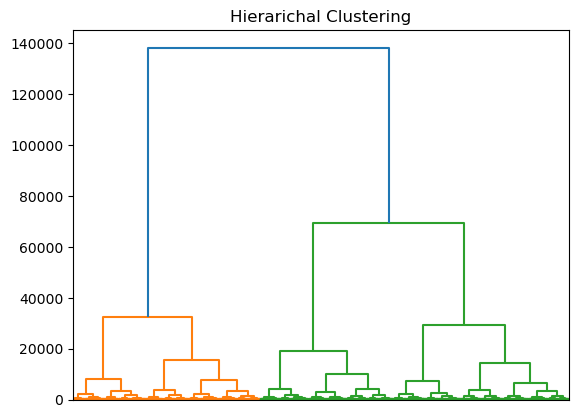

In [36]:
den=sch.dendrogram(z)
plt.tick_params(
         axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
plt.title('Hierarichal Clustering')

 the number of clusters will be the number of verticle lines which are being intersected by the lines drawn using the thresold . So we need to determine the cutting line.

we can see that there are basically 2 clusters are possible


# Creating a Herirical clustering model

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
hc_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [39]:
y_cluster=hc_model.fit_predict(data_final)

In [40]:
#adding the cluster column
data_cluster=data_final.copy()

In [41]:
data_cluster['cluster']=y_cluster.astype('object')

In [42]:
data_cluster.head()

,churches,resorts,beaches,parks,theaters,museums,malls,zoo,restaurent,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,1
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,1
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,1
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,1
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,1


# visualizing the cluster

In [43]:
cols=list(data_final.columns)
cols

['churches',
 'resorts',
 'beaches',
 'parks',
 'theaters',
 'museums',
 'malls',
 'zoo',
 'restaurent',
 'pubs_bars',
 'local_services',
 'burzer_pizza_shops',
 'hotel_other_lodgings',
 'juice_bars',
 'art_gallaries',
 'dance_clubs',
 'swimming_pools',
 'gyms',
 'bakeries',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens',
 'id']

In [ ]:
#sns.pairplot(data_cluster,hue='cluster',diag_kind='hist')

# 9.Conclusion
By using heirarical clustering we clustered review into two category,positive review and a negative review

In [44]:
result=data_cluster.copy()

In [45]:
result.replace({'cluster':1},'Positive',inplace=True)
result.replace({'cluster':0}, 'Negative',inplace=True)

In [46]:
result.head()

,churches,resorts,beaches,parks,theaters,museums,malls,zoo,restaurent,pubs_bars,...,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,id,cluster
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1,Positive
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,2,Positive
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3,Positive
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,4,Positive
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,5,Positive
